In [74]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [75]:
os.chdir("D:\\GEGDC\\KT00475829\\R work\\Data sets\\House price prediction dataset")
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")

In [76]:
train.shape

(1460, 81)

In [77]:
test.shape

(1459, 80)

In [78]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [79]:
train_id = train['Id']
test_id = test['Id']

In [80]:
train.drop('Id', inplace=True, axis=1)
test.drop('Id', inplace=True, axis=1)

In [81]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

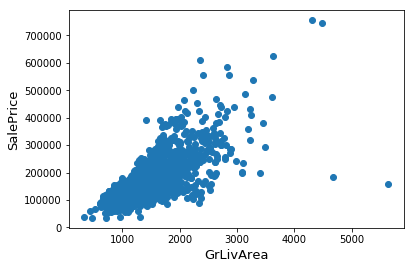

In [82]:
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [83]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000)&(train['SalePrice']<300000)].index)

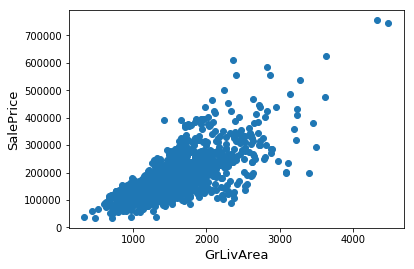

In [84]:
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [85]:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [86]:
#concatinating train and test
df = pd.concat((train, test)).reset_index(drop=True)

D:\GEGDC\KT00475829\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [87]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [88]:
#Finding missing values
per_missing = (df.isna().sum()/len(df))*100

In [89]:
per_missing

1stFlrSF          0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
Alley            93.212204
BedroomAbvGr      0.000000
BldgType          0.000000
BsmtCond          2.811107
BsmtExposure      2.811107
BsmtFinSF1        0.034282
BsmtFinSF2        0.034282
BsmtFinType1      2.708262
BsmtFinType2      2.742544
BsmtFullBath      0.068564
BsmtHalfBath      0.068564
BsmtQual          2.776826
BsmtUnfSF         0.034282
CentralAir        0.000000
Condition1        0.000000
Condition2        0.000000
Electrical        0.034282
EnclosedPorch     0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior1st       0.034282
Exterior2nd       0.034282
Fence            80.425094
FireplaceQu      48.680151
Fireplaces        0.000000
Foundation        0.000000
FullBath          0.000000
                   ...    
LotShape          0.000000
LowQualFinSF      0.000000
MSSubClass        0.000000
MSZoning          0.137127
MasVnrArea        0.788481
MasVnrType        0.822763
M

In [90]:
type(per_missing)

pandas.core.series.Series

In [91]:
missing_data = pd.DataFrame(per_missing)

In [92]:
missing_data = missing_data.sort_values(0, ascending = False)

In [93]:
missing_data.head(20)

,0
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
SalePrice,50.017141
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageFinish,5.450806
GarageCond,5.450806


In [94]:
y = df['SalePrice']
df.drop('SalePrice', axis=1, inplace=True)


In [95]:
#Imputing missing values
df['PoolQC'] = df['PoolQC'].fillna("None")

In [96]:
col = ['MiscFeature','Alley','Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType','MSSubClass']

In [97]:
for i in col:
    df[i] = df[i].fillna("None")

In [98]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

In [99]:
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [100]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)

In [101]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [102]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [103]:
df = df.drop(['Utilities'], axis=1)

In [104]:
df["Functional"] = df["Functional"].fillna("Typ")
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])


In [105]:
per_missing = (df.isna().sum()/len(df))*100

In [106]:
per_missing

1stFlrSF         0.0
2ndFlrSF         0.0
3SsnPorch        0.0
Alley            0.0
BedroomAbvGr     0.0
BldgType         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
BsmtQual         0.0
BsmtUnfSF        0.0
CentralAir       0.0
Condition1       0.0
Condition2       0.0
Electrical       0.0
EnclosedPorch    0.0
ExterCond        0.0
ExterQual        0.0
Exterior1st      0.0
Exterior2nd      0.0
Fence            0.0
FireplaceQu      0.0
Fireplaces       0.0
Foundation       0.0
FullBath         0.0
                ... 
LotConfig        0.0
LotFrontage      0.0
LotShape         0.0
LowQualFinSF     0.0
MSSubClass       0.0
MSZoning         0.0
MasVnrArea       0.0
MasVnrType       0.0
MiscFeature      0.0
MiscVal          0.0
MoSold           0.0
Neighborhood     0.0
OpenPorchSF      0.0
OverallCond      0.0
OverallQual      0.0
PavedDrive       0.0
PoolArea     

In [107]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['OverallCond'] = df['OverallCond'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [108]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [109]:
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

In [110]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression

In [111]:
model = LinearRegression()

In [112]:
print(df.shape)
print(y.shape)

(2917, 78)
(2917,)


In [113]:
#train test split
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(df,y, test_size = 0.3, random_state = 2)

In [114]:
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'WD'

In [115]:
x_train.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,PoolArea,PoolQC,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.00000,2041.000000,2041.000000,...,2041.000000,2041.000000,2041.000000,2041.00000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000
mean,1164.190593,321.397844,2.721215,0.988241,2.847624,3.690348,2.315532,440.21754,48.414503,3.206271,...,2.713376,2.992161,16.272905,0.99608,6.414993,1052.902009,94.095541,1970.604606,1983.756492,1.792259
std,392.459208,424.890526,26.642719,0.259824,0.830075,0.954941,1.160375,446.65146,168.214215,2.252032,...,39.437238,0.136257,56.794249,0.06250,1.592184,432.110384,126.372707,30.171145,21.103061,1.316173
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,2.000000,0.000000,0.000000,1872.000000,1950.000000,0.000000
25%,882.000000,0.000000,0.000000,1.000000,2.000000,4.000000,2.000000,0.00000,0.000000,2.000000,...,0.000000,3.000000,0.000000,1.00000,5.000000,793.000000,0.000000,1953.000000,1964.000000,1.000000
50%,1088.000000,0.000000,0.000000,1.000000,3.000000,4.000000,3.000000,370.00000,0.000000,2.000000,...,0.000000,3.000000,0.000000,1.00000,6.000000,991.000000,0.000000,1971.000000,1992.000000,2.000000
75%,1398.000000,682.000000,0.000000,1.000000,3.000000,4.000000,3.000000,739.00000,0.000000,6.000000,...,0.000000,3.000000,0.000000,1.00000,7.000000,1309.000000,168.000000,2000.000000,2003.000000,3.000000
max,5095.000000,1872.000000,508.000000,2.000000,8.000000,4.000000,4.000000,4010.00000,1526.000000,6.000000,...,800.000000,3.000000,576.000000,1.00000,15.000000,5095.000000,870.000000,2010.000000,2010.000000,4.000000


In [116]:
y_train

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
984,1164,0,0,1,3,2fmCon,4,3,1040.0,0.0,...,Normal,ConLD,0,1,5,1164.0,0,1950,1950,2
1541,765,0,0,1,2,1Fam,4,3,188.0,0.0,...,Normal,WD,0,1,4,765.0,135,1925,1950,4
1890,1368,0,0,1,3,1Fam,4,2,1078.0,0.0,...,Normal,WD,0,1,6,1078.0,0,1950,1950,3
1006,546,546,0,1,3,TwnhsE,4,3,273.0,273.0,...,Normal,WD,0,1,6,546.0,238,1970,1970,3
236,1414,0,0,1,3,1Fam,4,0,24.0,0.0,...,Normal,WD,0,1,6,1414.0,132,2004,2004,4
2886,672,0,0,1,2,1Fam,4,3,0.0,0.0,...,Normal,WD,0,1,4,432.0,0,1925,1950,0
707,728,728,0,1,3,1Fam,4,0,0.0,0.0,...,Partial,New,0,1,8,728.0,100,2007,2007,1
110,1216,639,0,1,4,1Fam,0,3,444.0,0.0,...,Normal,WD,0,1,7,994.0,182,1954,1972,0
1888,1072,0,0,1,2,TwnhsE,4,1,547.0,0.0,...,Normal,WD,0,1,5,547.0,0,2005,2006,3
1481,1145,0,0,1,2,TwnhsE,4,0,16.0,0.0,...,Normal,WD,0,1,6,1145.0,100,2006,2006,4


In [117]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,1,3,1Fam,4,3,706.0,0.0,...,Normal,WD,0,1,8,856.0,0,2003,2003,2
1,1262,0,0,1,3,1Fam,4,1,978.0,0.0,...,Normal,WD,0,1,6,1262.0,298,1976,1976,1
2,920,866,0,1,3,1Fam,4,2,486.0,0.0,...,Normal,WD,0,1,6,920.0,0,2001,2002,2
3,961,756,0,1,3,1Fam,1,3,216.0,0.0,...,Abnorml,WD,0,1,7,756.0,0,1915,1970,0
4,1145,1053,0,1,4,1Fam,4,0,655.0,0.0,...,Normal,WD,0,1,9,1145.0,192,2000,2000,2
